In [409]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [410]:
HSI_Raw = sc.io.loadmat("Data\sp100.mat")
print(HSI_Raw)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 09 11:02:37 2014', '__version__': '1.0', '__globals__': [], 'Y': array([[-0.00136637,  0.        , -0.00610936, ...,  0.00763582,
         0.00050221,  0.00593558],
       [ 0.0094474 ,  0.        , -0.0023535 , ...,  0.00052138,
         0.00104194, -0.00208496],
       [-0.00661816,  0.00022131,  0.00375484, ...,  0.00437265,
        -0.00546881,  0.00194789],
       ...,
       [ 0.00841139,  0.01395247,  0.0029267 , ..., -0.00417029,
         0.00711376, -0.00693965],
       [ 0.03047855,  0.02435916, -0.00761458, ..., -0.00362489,
         0.02497141,  0.00222761],
       [ 0.00238055,  0.02250305, -0.00699886, ..., -0.00087873,
         0.        , -0.00220022]])}


plotting

(98, 753)


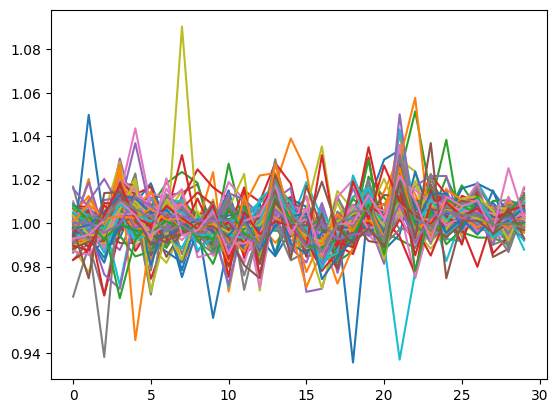

In [411]:
HSI = HSI_Raw['Y']
print(HSI.shape)
#read the last 30 days(from day -60 to day -30)
nb_days = HSI.shape[1]
nb_instances = HSI.shape[0]
HSI = np.exp(HSI)

HSI_train = HSI[: , 0:nb_days-30]
HSI_test = HSI[: , nb_days-30:nb_days]

plt.plot(HSI_test.T)

<b>GD

simplex projection

In [412]:
import numpy as np
import matplotlib.pyplot as plt

# Sorting function
def sorting_y(y):
    return np.sort(y)

# Calculate ti
def calculate_ti(y, i):
    n = len(y)
    sum_val = 0
    for j in range(i, n):
        sum_val += y[j]
    sum_val -= 1
    return (sum_val / (n - i))

# Calculate te (step 4)
def calculate_te_step4(y):
    return calculate_ti(y, 0)

# Step 3 logic: return te
def Step3(y, i):
    while i >= 0:
        ti = calculate_ti(y, i)
        if ti >= y[i]:
            return ti
        i -= 1
    # If we reach i = -1, calculate te using step 4
    return calculate_te_step4(y)

# Step 5 logic: apply the final te to get the projected values
def step5(y, te):
    return [max(yi - te, 0) for yi in y]  # Ensure non-negativity by using max

# The main algorithm function
def simplex_projection(y):
    y_OG = y.copy()  # Copy the original y to apply te later
    ysorted = sorting_y(y.copy())
    n = len(y)
    i = n - 1
    
    # Compute te
    te = Step3(ysorted, i)
    
    # Return the projection
    result = step5(y_OG, te)
    
    # Normalize to ensure sum(result) = 1
    total = np.sum(result)
    return np.array(result) / total if total != 0 else result

In [413]:
def calculate_variance(w):
    XWcn = HSI_test.T @ w
    mean = np.mean(XWcn)
    print(mean)
    var = np.sum(np.square(XWcn - mean))/31
    return var

In [414]:
def gradient_descent_with_simplex_projection(C, w_init, learning_rate=0.01, num_iters=100):
    w = w_init
    e = []
    variances=[]
    for k in range(num_iters):
        # Compute the gradient of the objective function w^T C w
        grad = 2 * np.dot(C, w)
        wprev = w
        # Gradient update
        w = w - learning_rate * grad
        
        # Project back onto the simplex
        w = simplex_projection(w)

        eapp = np.linalg.norm(w - wprev)
        e.append(eapp)
        variances.append(calculate_variance(w))
        if(eapp < 1e-06):
            break
        
    return w,k,e,variances

minimizing wcw

In [415]:
import numpy as np
import plotly.graph_objects as go

# Assuming HSI_train, HSI_test, and gradient_descent_with_simplex_projection are defined

# Calculate covariance matrix
cov = np.cov(HSI_train, bias=False)

C = cov
w_init = np.zeros(HSI_test[:, 0].shape)
Wcn, k, e,variances = gradient_descent_with_simplex_projection(C, w_init, learning_rate=0.01, num_iters=100)

# Print results
print(Wcn)
print("Number of iterations:", k)
print(Wcn.shape)
print(HSI_test.shape)
print(Wcn.shape)

# Compute XWcn
XWcn = HSI_test.T @ Wcn

# Plot the first figure (XWcn)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=XWcn, mode='lines', name='XWcn'))
fig1.update_layout(title='Plot of XWcn',
                   xaxis_title='Index',
                   yaxis_title='XWcn Value',
                   showlegend=True)
fig1.show()

# Plot the second figure (error over iterations)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(0, k + 1)), y=e, mode='lines+markers', name='Error'))
fig2.update_layout(title='Error over Iterations',
                   xaxis_title='Iteration',
                   yaxis=dict(type='log'),
                   yaxis_title='Error Value',
                   showlegend=True)
fig2.show()


1.0008419629756546
1.0008419404303721
1.0008419178859613
1.0008418953424227
1.0008418727997561
1.000841850257962
1.0008418277170388
1.0008418051769878
1.000841782637809
1.0008417600995019
1.0008417375620666
1.0008417150255027
1.000841692489811
1.000841669954991
1.0008416474210418
1.0008416248879652
1.0008416023557594
1.0008415798244255
1.0008415572939628
1.0008415347643718
1.000841512235652
1.0008414897078037
1.0008414671808268
1.0008414446547211
1.0008414221294866
1.0008413996051237
1.0008413770816313
1.0008413545590102
1.0008413320372602
1.0008413095163815
1.0008412869963736
1.0008412644772373
1.0008412419589712
1.0008412194415761
1.0008411969250521
1.0008411744093988
1.0008411518946163
1.0008411293807047
1.0008411068676637
1.0008410843554933
1.0008410618441939
1.0008410393337648
1.0008410168242063
1.0008409943155183
1.0008409718077007
1.000840949300754
1.0008409267946772
1.0008409042894713
1.000840881785135
1.0008408592816693
1.0008408367790742
1.0008408142773493
1.000840791776494
1

saving the distance between steps "e"

In [416]:
import numpy as np
from scipy.io import savemat

# Save e to a .mat file
savemat('naive_e_sp100.mat', {'e': e})
print("Saved e to data_e.mat")

# Save e to a .mat file
savemat('naive_variances_sp100.mat', {'e': variances})

Saved e to data_e.mat


In [417]:
mean = np.mean(XWcn)
print(mean)
var = np.sum(np.square(XWcn - mean))/31
print(var)

1.000839735217192
2.7416967748529316e-05
